In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv(
    "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
    na_values=["9999", "", " ", "Presented but no response", "NA"],
    low_memory=False
)
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only


In [2]:
"""
Note:
- fix the order of wellness self rated mental health
- see if I can combine multiple health indicators
- see if I can bootstrap more values for people who are single but dating
"""

'\nNote:\n- fix the order of wellness self rated mental health\n- see if I can combine multiple health indicators\n- see if I can bootstrap more values for people who are single but dating\n'

In [3]:
A = 'WELLNESS_life_satisfaction'
B = 'DEMO_relationship_status'
C = 'DEMO_age'
D = 'COVID_vaccinated'
E = 'CONNECTION_activities_greeted_neighbour_or_stranger_pm'
F = 'CONNECTION_activities_group_exercise_pm'
G = 'CONNECTION_activities_helped_pm'
H = 'CONNECTION_activities_hug_pm'
I = 'CONNECTION_activities_kissed_pm'
J = 'CONNECTION_activities_visited_family_pm'
K = 'CONNECTION_activities_visited_friends_pm'
L = 'CONNECTION_activities_new_friend_pm'
M = 'WELLNESS_self_rated_mental_health'
categories = [A,B,C,D,E,F,G,H,I,J,K,L,M]

data2 = data[categories]

cleaned_df = data2.dropna()

# Swap values between index 1 and index 3 for 'WELLNESS_self_rated_mental_health'
temp = cleaned_df.loc[1, 'WELLNESS_self_rated_mental_health']
cleaned_df.loc[1, 'WELLNESS_self_rated_mental_health'] = cleaned_df.loc[3, 'WELLNESS_self_rated_mental_health']
cleaned_df.loc[3, 'WELLNESS_self_rated_mental_health'] = temp

# Verify the swap was successful
print(cleaned_df['WELLNESS_self_rated_mental_health'].iloc[[1, 3]])
print(cleaned_df['WELLNESS_self_rated_mental_health'].unique())


1         Poor
3    Very good
Name: WELLNESS_self_rated_mental_health, dtype: object
['Poor' 'Very good' 'Good' 'Fair' 'Excellent']


In [4]:
cleaned_df3 = cleaned_df.copy()
social_activities = [E,F,G,H,I,J,K,L]
for activity in social_activities:
    cleaned_df3.loc[:, activity] = cleaned_df3[activity].map({"Yes": 1, "No": 0})

cleaned_df3['average_activity'] = cleaned_df3[social_activities].mean(axis=1)

['Poor' 'Very good' 'Good' 'Fair' 'Excellent']
['Poor' 'Fair' 'Good' 'Very good' 'Excellent']


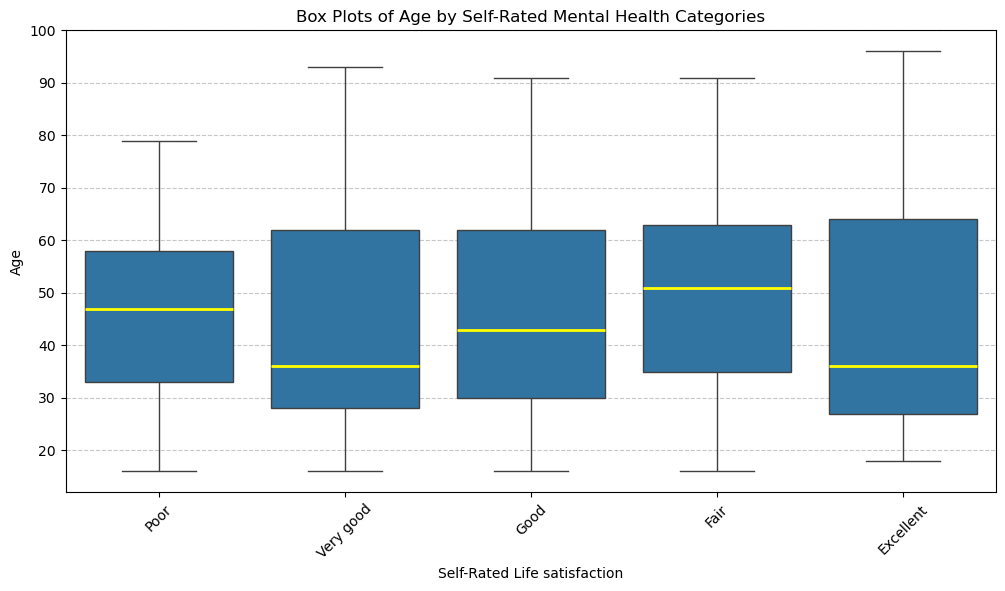

In [5]:

# Assume cleaned_df and data are pre-defined
# Get unique categories
raw_categories = cleaned_df['WELLNESS_self_rated_mental_health'].unique()
print(raw_categories)

categories = raw_categories[:5]  # Select the top 5 categories for plotting
temp = categories[1]
categories[1] = categories[3]
categories[3] = temp
print(categories)

# Filter the DataFrame to include only the selected categories
subset_data = cleaned_df[cleaned_df['WELLNESS_self_rated_mental_health'].isin(categories)]

# Create a single box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='WELLNESS_self_rated_mental_health',  # Categories on the x-axis
    y='DEMO_age',  # Values for the box plot on the y-axis
    data=subset_data,  # Data to plot
    medianprops={"color": "yellow", "linewidth": 2}  # Highlight the median line
)

# Customize the plot
plt.title('Box Plots of Age by Self-Rated Mental Health Categories')
plt.xlabel('Self-Rated Life satisfaction')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid for y-axis

plt.show()


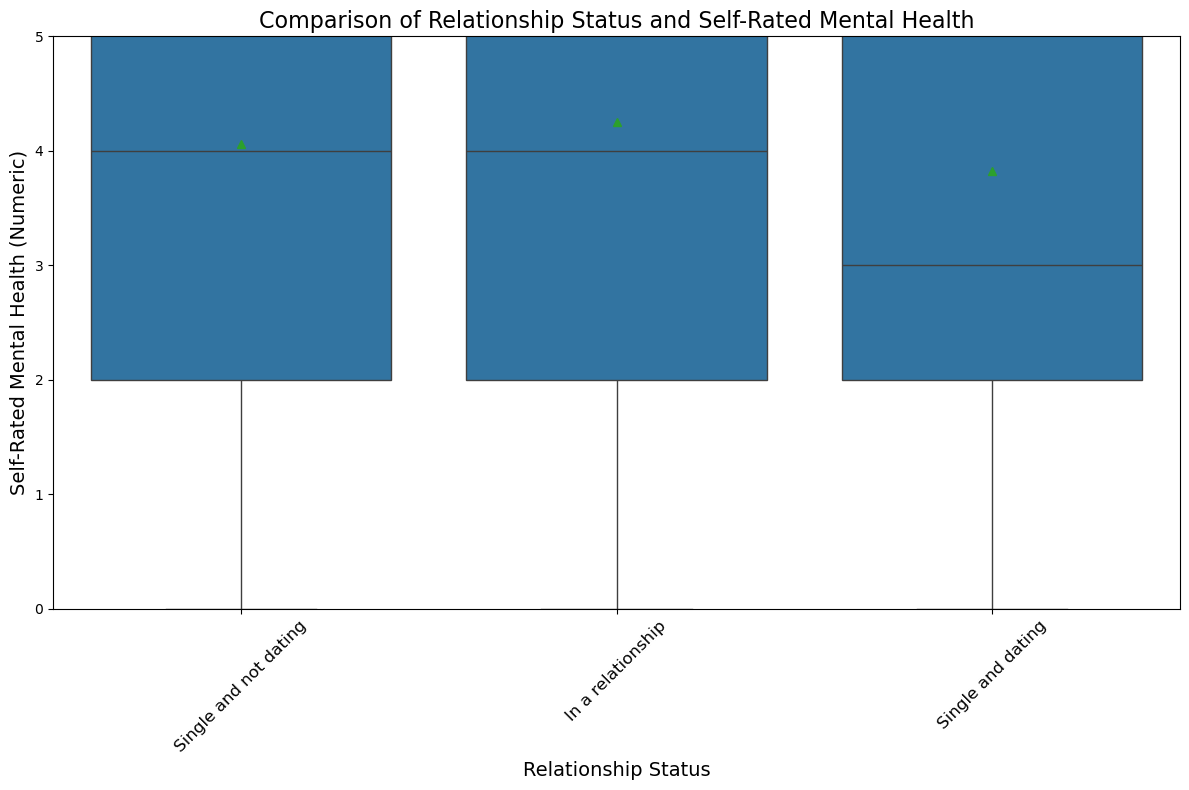

In [6]:

# Create a deep copy of the original data to avoid changing the original data
cleaned_df2 = cleaned_df.copy()

# Map the 'WELLNESS_self_rated_mental_health' categories to numeric values
category_mapping = {category: i for i, category in enumerate(cleaned_df2['WELLNESS_life_satisfaction'].unique())}
cleaned_df2['WELLNESS_life_satisfaction'] = cleaned_df2['WELLNESS_life_satisfaction'].map(category_mapping)

# Drop rows with missing values in relevant columns
cleaned_data = cleaned_df2.dropna(subset=['DEMO_relationship_status', 'WELLNESS_life_satisfaction'])

# Create the box plot without palette to avoid deprecation warning
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='DEMO_relationship_status',
    y='WELLNESS_life_satisfaction',
    data=cleaned_data,
    showmeans=True  # Add this to show the mean and help with understanding distribution
)

# Add titles and labels
plt.title('Comparison of Relationship Status and Self-Rated Mental Health', fontsize=16)
plt.xlabel('Relationship Status', fontsize=14)
plt.ylabel('Self-Rated Mental Health (Numeric)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Adjust y-axis limits if necessary to zoom in
plt.ylim(0, 5)  # Adjust based on the range of your data

# Display the plot
plt.tight_layout()
plt.show()

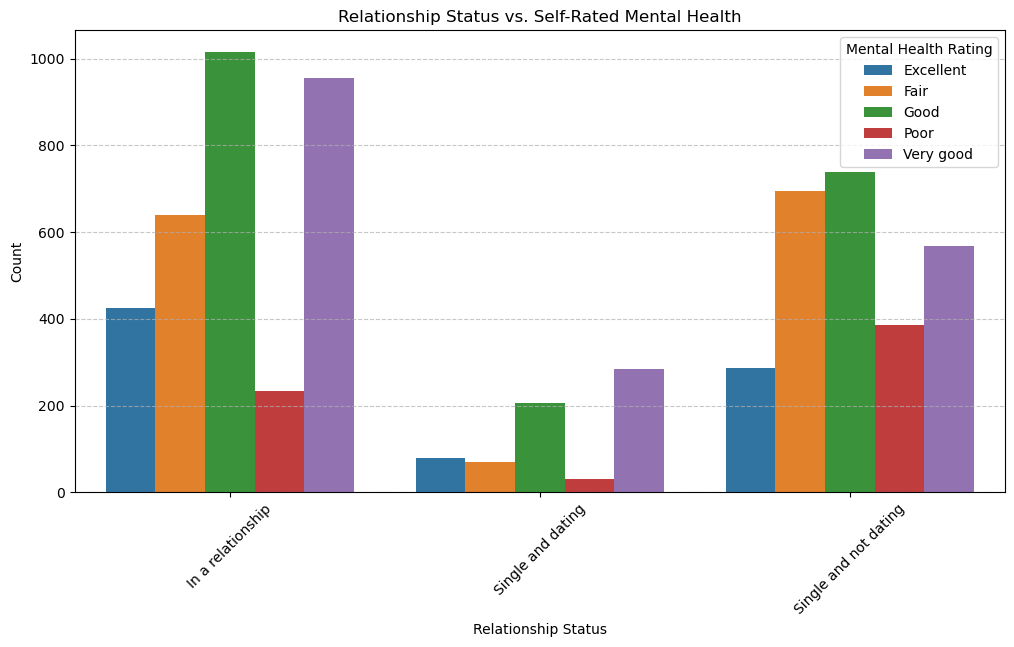

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and count data by relationship status and physical wellness
grouped_data = cleaned_df.groupby(['DEMO_relationship_status', 'WELLNESS_self_rated_mental_health']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='DEMO_relationship_status', 
    y='Count', 
    hue='WELLNESS_self_rated_mental_health', 
    data=grouped_data
)

plt.title('Relationship Status vs. Self-Rated Mental Health')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Mental Health Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


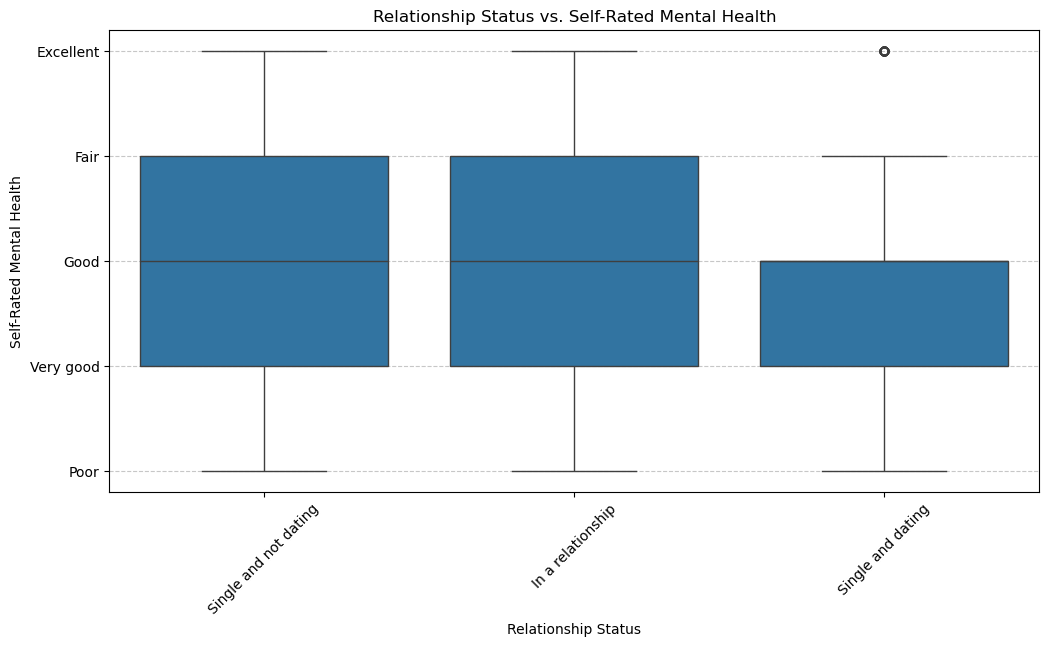

In [8]:
# Box plot for relationship status vs. physical wellness
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x='DEMO_relationship_status', 
    y='WELLNESS_self_rated_mental_health', 
    data=cleaned_df
)

# Reverse the y-axis
ax.invert_yaxis()

plt.title('Relationship Status vs. Self-Rated Mental Health')
plt.xlabel('Relationship Status')
plt.ylabel('Self-Rated Mental Health')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


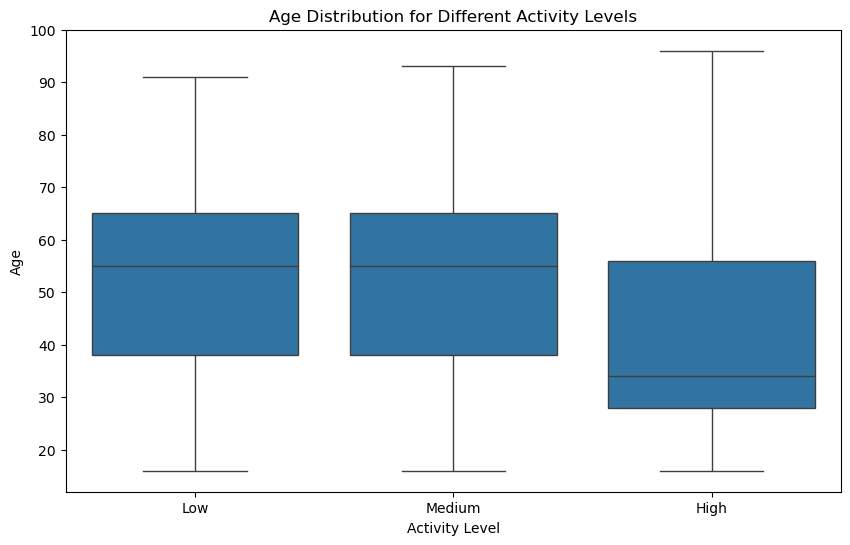

In [9]:
# Create a new column to categorize activity levels (optional)
cleaned_df3['activity_level'] = pd.cut(cleaned_df3['average_activity'], bins=[-0.1, 0.3, 0.6, 1.0], labels=['Low', 'Medium', 'High'])

# Box plot of age vs activity level
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='activity_level',  # Categories: Low, Medium, High
    y='DEMO_age',  # Age
    data=cleaned_df3
)

# Customize the plot
plt.title('Age Distribution for Different Activity Levels')
plt.xlabel('Activity Level')
plt.ylabel('Age')
plt.show()


In [10]:
# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 100]  # Adjust bins based on your data
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create 'Age Group' column based on the 'DEMO_age' column
cleaned_df3['Age Group'] = pd.cut(cleaned_df3['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Check the DataFrame to ensure the 'Age Group' column is created
print(cleaned_df3[['DEMO_age', 'Age Group']].head())


   DEMO_age Age Group
0      71.0       70+
1      69.0     60-69
2      56.0     50-59
3      54.0     50-59
4      30.0     30-39


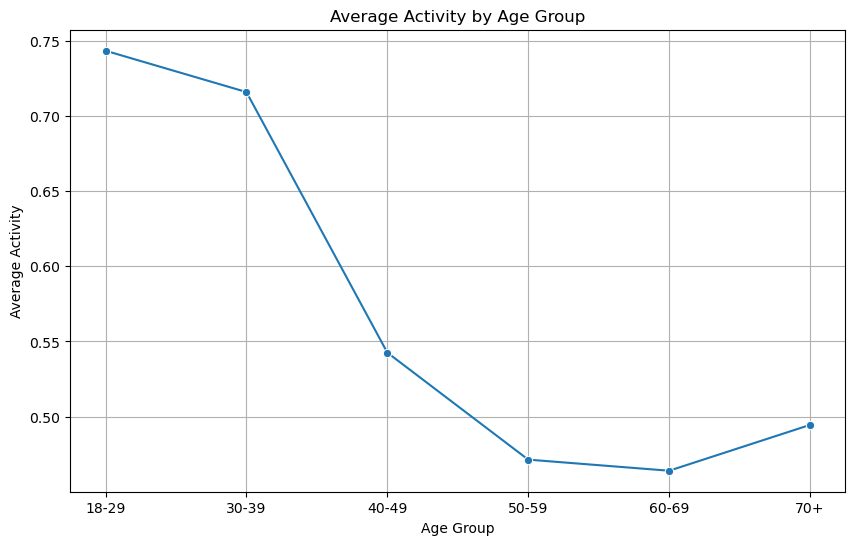

In [11]:
# Calculate the average activity by age group, setting observed=False in groupby
age_activity_avg = cleaned_df3.groupby('Age Group', observed=False)['average_activity'].mean().reset_index()

# Line plot of average activity vs age group
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Age Group', 
    y='average_activity', 
    data=age_activity_avg, 
    marker='o'
)

# Customize the plot
plt.title('Average Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Activity')
plt.grid(True)
plt.show()



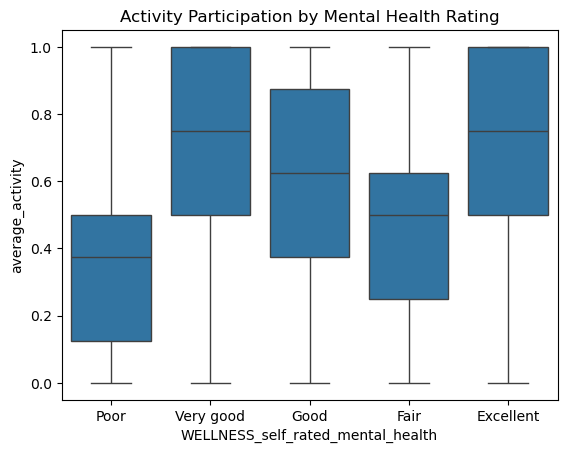

In [12]:
sns.boxplot(x='WELLNESS_self_rated_mental_health', y='average_activity', data=cleaned_df3)
plt.title('Activity Participation by Mental Health Rating')
plt.show()

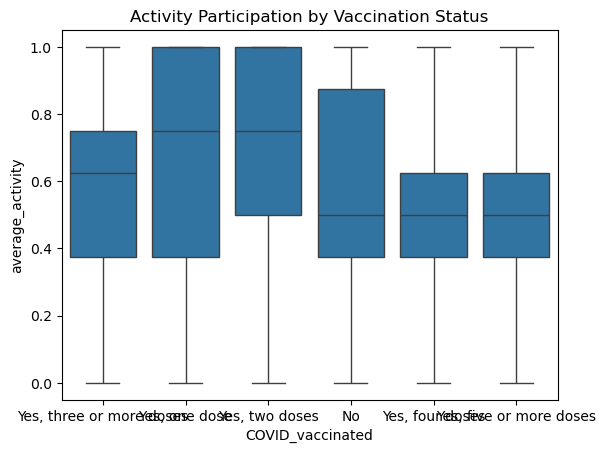

In [13]:
sns.boxplot(x='COVID_vaccinated', y='average_activity', data=cleaned_df3)
plt.title('Activity Participation by Vaccination Status')
plt.show()

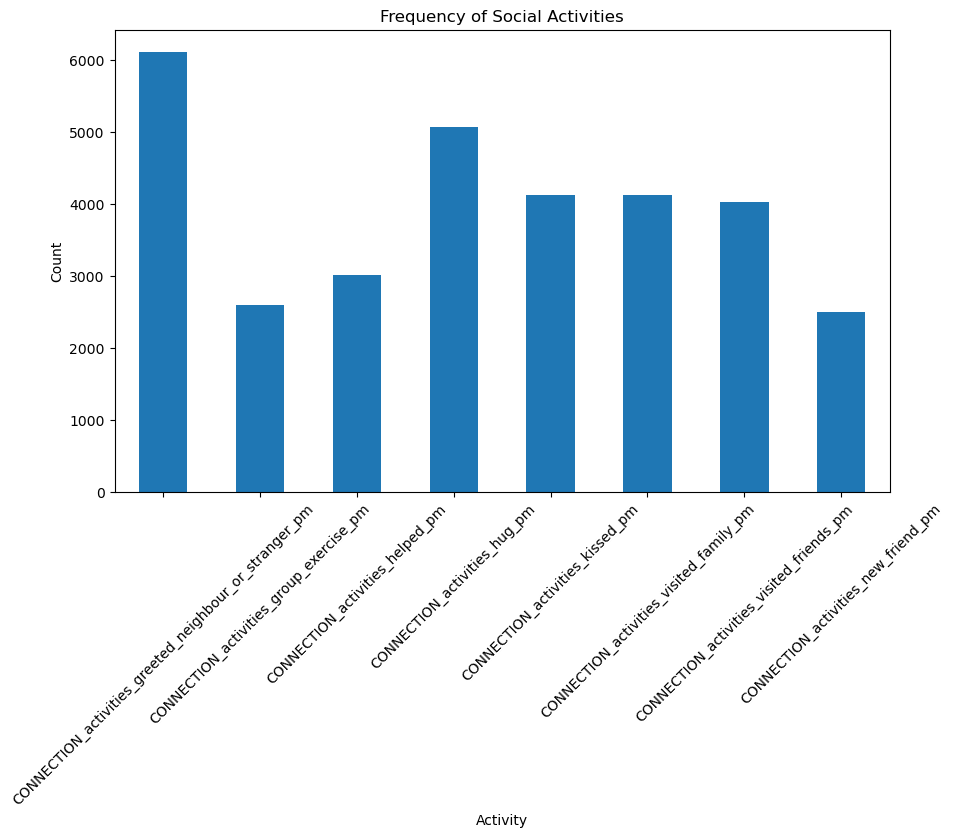

In [14]:
activity_counts = cleaned_df3[social_activities].sum()
activity_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Social Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()